<a href="https://colab.research.google.com/github/kilos11/Data_Science/blob/main/face(SVM)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition using SVM

In [ ]:

from sklearn.datasets import fetch_lfw_people
# Import the function 'fetch_lfw_people' from the 'sklearn.datasets' module
# This function is used to fetch the Labeled Faces in the Wild (LFW) dataset, which contains images of people's faces

from sklearn.svm import SVC
# Import the Support Vector Classifier (SVC) class from the 'sklearn.svm' module
# SVC is a popular machine learning algorithm for classification tasks

from sklearn.decomposition import PCA as RandomizedPCA
# Import the Principal Component Analysis (PCA) class from the 'sklearn.decomposition' module
# PCA is a dimensionality reduction technique used to reduce the number of features in a dataset

from sklearn.pipeline import make_pipeline
# Import the 'make_pipeline' function from the 'sklearn.pipeline' module
# This function is used to create a pipeline of multiple machine learning steps

from sklearn.model_selection import train_test_split
# Import the 'train_test_split' function from the 'sklearn.model_selection' module
# This function is used to split the dataset into training and testing subsets

from sklearn.model_selection import GridSearchCV
# Import the 'GridSearchCV' class from the 'sklearn.model_selection' module
# GridSearchCV is used to perform grid search over specified parameter values for a given estimator

from sklearn.metrics import classification_report
# Import the 'classification_report' function from the 'sklearn.metrics' module
# classification_report is used to generate a text report showing the main classification metrics

from sklearn.metrics import confusion_matrix
# Import the 'confusion_matrix' function from the 'sklearn.metrics' module
# confusion_matrix is used to compute the confusion matrix to evaluate the accuracy of a classification

import matplotlib.pyplot as plt
# Import the 'pyplot' module from the 'matplotlib' library
# pyplot is used for creating various types of plots and visualizations

import numpy as np
# Import the 'numpy' library
# numpy provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions

import pandas as pd
# Import the 'pandas' library
# pandas is a powerful data manipulation and analysis tool

import seaborn as sns
# Import the 'seaborn' library
# seaborn is a data visualization library based on matplotlib

%matplotlib inline
# This line is a magic function that allows matplotlib plots to be displayed inline in Jupyter Notebook or JupyterLab
# It ensures that the plots are displayed immediately below the code cell

In [ ]:

plt.style.use('dark_background')
# Set the style of the plots to 'dark_background'
# This line changes the visual style of the plots to have a dark background and light-colored elements.

In [ ]:

# Import the necessary libraries
from sklearn.datasets import fetch_lfw_people

# Fetch the LFW dataset with a minimum of 60 faces per person
faces = fetch_lfw_people(min_faces_per_person=60)

# Print the target names, which represent the names of the people in the dataset
print(faces.target_names)

# Print the shape of the dataset, which represents the number of images and their dimensions
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


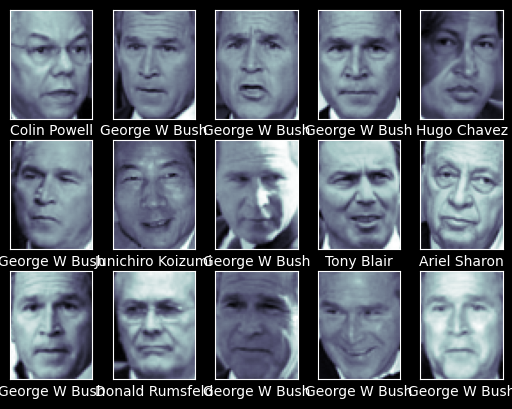

In [ ]:

# Import the necessary libraries
import matplotlib.pyplot as plt

# Create a figure and axes grid with 3 rows and 5 columns
fig, ax = plt.subplots(3, 5)

# Loop over each axis in the grid
for i, axi in enumerate(ax.flat):
    # Display the i-th image from the faces dataset on the current axis
    axi.imshow(faces.images[i], cmap='bone')

    # Remove the x and y ticks from the plot
    axi.set(xticks=[], yticks=[])

    # Set the x-label of the plot to the name of the person in the i-th image
    axi.set(xlabel=faces.target_names[faces.target[i]])

In [ ]:

# Import the necessary libraries
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Create a RandomizedPCA object with 150 components and enable whitening
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

# Create an SVC (Support Vector Classifier) object with an RBF kernel and balanced class weights
svc = SVC(kernel='rbf', class_weight='balanced')

# Create a pipeline that combines the PCA and SVC models
model = make_pipeline(pca, svc)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:

# Import the necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the GridSearchCV
param_grid = {
    'svc__C': [1, 5, 10, 50],      # Different values of C (regularization parameter)
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]   # Different values of gamma (kernel coefficient)
}

# Create a GridSearchCV object with the defined model and parameter grid
grid = GridSearchCV(model, param_grid)

# Fit the grid search on the training data and measure the time taken
%time grid.fit(Xtrain, ytrain)

# Print the best parameters found by the grid search
print(grid.best_params_)

In [ ]:

# Set the model to the best estimator found by the grid search
model = grid.best_estimator_

# Use the trained model to predict the labels for the test data
yfit = model.predict(Xtest)

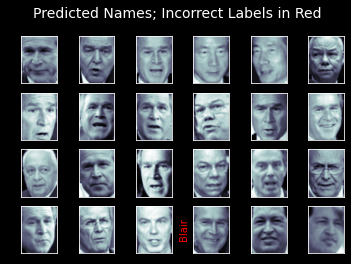

In [ ]:

# Create a figure and axes grid with 4 rows and 6 columns
fig, ax = plt.subplots(4, 6)

# Loop over each axis in the grid
for i, axi in enumerate(ax.flat):
    # Display the i-th image from the test data after reshaping it to its original dimensions
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')

    # Remove the x and y ticks from the plot
    axi.set(xticks=[], yticks=[])

    # Set the y-label of the plot to the predicted name from the target_names array
    # If the prediction is incorrect, set the label color to red, otherwise black
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')

# Set the main title of the figure
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



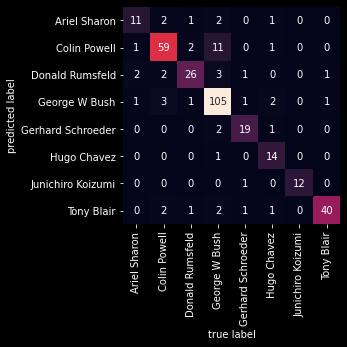

In [ ]:

# Compute the confusion matrix between the true labels (ytest) and predicted labels (yfit)
mat = confusion_matrix(ytest, yfit)

# Create a heatmap of the transposed confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)

# Set the x-label of the plot to 'true label' and the y-label to 'predicted label'
plt.xlabel('true label')
plt.ylabel('predicted label')